In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
import pandas as pd
from sklearn.metrics import cohen_kappa_score

In [2]:
# Load rater_1 and rater_2 Excel sheets for GHA analysis
file_path = 'C:\\paper\\empirical_analysis\\data\\RQ1\\both_raters.xlsx'  # Update with your actual file path
sheet1_name = 'rater_1'
sheet2_name = 'rater_2'

In [3]:
df1 = pd.read_excel(file_path, sheet_name=sheet1_name)
df2 = pd.read_excel(file_path, sheet_name=sheet2_name)
df2.set_index(df1.index, inplace=True)

In [7]:
category_series_1 = df1['GHACategory'].astype(str).str.lower()
category_series_2 = df2['GHACategory'].astype(str).str.lower()

In [11]:
different_rows = pd.DataFrame(columns=df2.columns)
new_index = 0

for i in range(df2.shape[0]):
    categories1 = category_series_1[i]
    categories2 = category_series_2[i]
    row_to_add = df2.iloc[i]
    
    if categories1 != categories2:
        different_rows.loc[new_index] = row_to_add
        different_rows.at[new_index, 'GHAcategory_rater1'] = str(categories1)
        different_rows.at[new_index, 'differences_rater2'] = str(categories2)
        new_index += 1

# Save the differing rows to an Excel file
with pd.ExcelWriter('C:\\paper\\empirical_analysis\\data\\RQ1\\gha_differences.xlsx', engine='openpyxl') as writer:
   different_rows.to_excel(writer, sheet_name='result1', index=True)

In [10]:
kappa = cohen_kappa_score(category_series_1, category_series_2)
print(f"Cohen's Kappa: {kappa}")

Cohen's Kappa: 1.0


In [12]:
file_path = 'C:\\paper\\empirical_analysis\\data\\RQ1\\labeled_rater_1_test.xlsx'  
sheet1_name = 'agreement'

df = pd.read_excel(file_path, sheet_name=sheet1_name)

In [17]:
df['NormalizedCategory'] = df['GHACategory'].str.lower()
category_counts = df['NormalizedCategory'].value_counts()
category_percentages = category_counts / category_counts.sum() * 100
result_dict = category_percentages.to_dict()

print(result_dict)

{'build process organization': 66.1064425770308, 'maintainability': 20.448179271708682, 'infrastructure': 7.002801120448179, 'performance': 2.5210084033613445, 'dashboard/notifications': 1.680672268907563, 'security': 1.680672268907563, 'build policy': 0.5602240896358543}


In [18]:
# Define the categories and compare against existing dataset
categories = ['build policy', 'build process organization', 'dashboard/notifications',
              'infrastructure', 'maintainability', 'performance', 'security']

ml_commits = [(key, result_dict[key]) for key in categories if key in result_dict]
ml_commits_sorted = sorted(ml_commits, key=lambda x: x[1], reverse=True)
# OSS data from Zampetti et al. for comparison
oss_commits = [9.13, 22.83, 7.69, 0.72, 28.60, 31.00, 1.20] 

In [19]:
sorted_categories = [x[0].title() for x in ml_commits_sorted]
sorted_ml_commits = [x[1] for x in ml_commits_sorted]

# Align the OSS data with the sorted ML commits
sorted_oss_commits = [oss_commits[categories.index(cat.lower())] for cat in sorted_categories]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


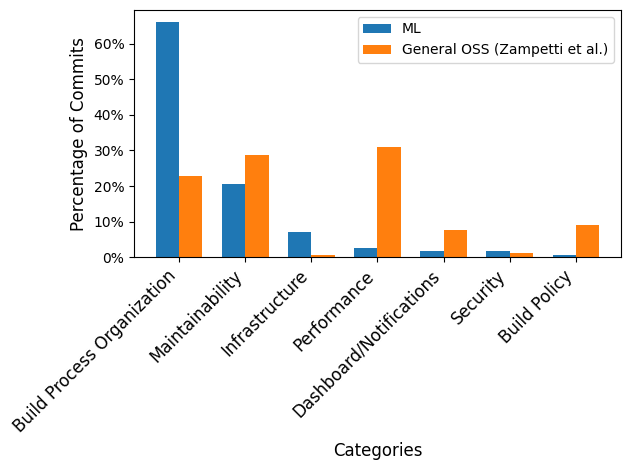

In [20]:
x = np.arange(len(sorted_categories))
bar_width = 0.35

fig, ax = plt.subplots()

# Plot ML commits
ax.bar(x - bar_width/2, sorted_ml_commits, bar_width, label='ML')

# Plot OSS commits
ax.bar(x + bar_width/2, sorted_oss_commits, bar_width, label='General OSS (Zampetti et al.)')

# Set x-axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(sorted_categories, rotation=45, ha='right', fontsize=12)
ax.set_xlabel('Categories', fontsize=12)
ax.set_ylabel('Percentage of Commits', fontsize=12)
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

# Add legend
ax.legend()

# Save the plot as an EPS file
plt.savefig('gha_rq1_distribution.eps', format='eps', bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


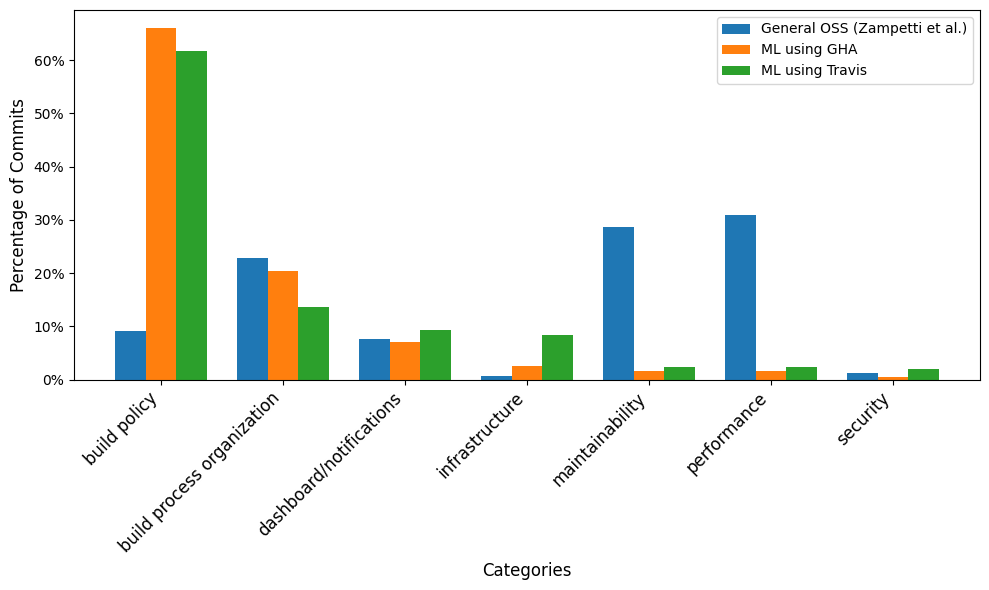

In [21]:
ml_travis_commits = [61.8, 13.7, 9.32, 8.45, 2.33, 2.33, 2.04]
ml_gha_commits = [sorted_ml_commits[i] for i in range(len(categories))]

# Plot configuration
x = np.arange(len(categories))  # the label locations
bar_width = 0.25  # width of the bars

# Create the figure and the axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot General OSS (Zampetti et al.)
ax.bar(x - bar_width, oss_commits, bar_width, label='General OSS (Zampetti et al.)')

# Plot ML using GHA
ax.bar(x, ml_gha_commits, bar_width, label='ML using GHA')

# Plot ML using Travis
ax.bar(x + bar_width, ml_travis_commits, bar_width, label='ML using Travis')

# Set x-axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=12)
ax.set_xlabel('Categories', fontsize=12)
ax.set_ylabel('Percentage of Commits', fontsize=12)
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

# Add a legend
ax.legend()

# Save the plot as an EPS file
plt.savefig('gha_travis_oss_comparison.eps', format='eps', bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()